# WordCloud, presidential conferences (México)

## Extract data

In [1]:
from bs4 import BeautifulSoup
import requests

# 19-Feb-2021 Conference URL
# url = 'https://presidente.gob.mx/19-02-21-version-estenografica-de-la-conferencia-de-prensa-matutina-del-presidente-andres-manuel-lopez-obrador/'
url = 'https://presidente.gob.mx/13-03-21-version-estenografica-proyecto-integral-islas-marias-desde-nayarit/'

res_request = requests.get(url)

In [2]:
soup = BeautifulSoup(res_request.text, 'html.parser')

In [3]:
# Extract the text and speakers
soup1 = soup.select("div p")
soup1

[<p style="text-align: right;"><em>2021: Año de la Independencia</em></p>,
 <p> </p>,
 <p><strong>PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:</strong> Amigas, amigos:</p>,
 <p>Nos da mucho gusto estar de nuevo en las Islas Marías, en la Isla Madre, para darle continuidad al proyecto que iniciamos desde el 2019, que se tomó la decisión de convertir la Isla Madre de penal, de cárcel, a centro educativo, ecológico y cultural.</p>,
 <p>Desde que se tomó esa decisión se ha venido a trabajando, se inició el traslado de reclusos a cárceles de los estados, procurando que estuvieran lo más cercano posible a sus familiares y se concluyó esa etapa.</p>,
 <p><audio controls="controls" src="http://presidente.gob.mx/wp-content/uploads/2021/03/Proyecto-Integral-Islas-Marias-desde-Nayarit.mp3"></audio></p>,
 <p><iframe allowfullscreen="allowfullscreen" height="400" src="//www.youtube.com/embed/KNkOTblX7-U?t=1692" width="600"></iframe></p>,
 <p>A partir de ahí comenzó a funcionar el centro ecológico, educa

In [4]:
# Analize and complete the names of speakers

import numpy as np 

speaker = []
current_speaker = np.nan

for i in soup1:
        if i.strong:
            speaker.append(i.strong.text)
            current_speaker = i.strong.text
        else:
            speaker.append(current_speaker)
len(speaker)

41

In [5]:
speaker

[nan,
 nan,
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS 

In [6]:
set_speakers = set(speaker)
set_speakers

{'Andrés Manuel López Obrador', 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:', nan}

In [7]:
# Count speech rows
speech = [i.text for i in soup1]
len(speech)

41

In [8]:
# Create a dataframe with speakers and speech

import pandas as pd

dfa = pd.DataFrame(
                    {
                        "speaker" : speaker,
                        "speech" : speech
                    })
dfa

,speaker,speech
0,NaN,2021: Año de la Independencia
1,NaN,
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Amigas...
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Nos da mucho gusto estar de nuevo en las Islas...
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Desde que se tomó esa decisión se ha venido a ...
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,
7,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,A partir de ahí comenzó a funcionar el centro ...
8,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Hace poco se tomó la decisión de entregar el m...
9,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Ya se concluyó una primera etapa de este plan ...


In [9]:
# Delete empty rows (without speakers: titles or dates)
dfa = dfa.dropna()
dfa.head()

,speaker,speech
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Amigas...
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Nos da mucho gusto estar de nuevo en las Islas...
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Desde que se tomó esa decisión se ha venido a ...
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,


In [10]:
# Get names of indexes for which column it's not a speech
indexNames = dfa[ dfa['speech'].str.contains('Copyright Derechos Reservados') ].index

dfb = dfa.copy()
# Delete these row indexes from dataFrame
dfb.drop(indexNames , inplace=True )

In [11]:
# Get names of indexes for which column it's not a speech
indexNames = dfb[ dfb['speech'] == '+++++' ].index

dfc = dfb.copy()

# Delete these row indexes from dataFrame
dfc.drop(indexNames , inplace=True)

In [12]:
# Get names of indexes for which column it's not a speech
indexNames = dfc[ dfc['speech'].str.lower().str.contains('inaudible')].index

dfd = dfc.copy()

# Delete these row indexes from dataFrame
dfd.drop(indexNames , inplace=True)

In [13]:
dfd

,speaker,speech
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Amigas...
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Nos da mucho gusto estar de nuevo en las Islas...
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Desde que se tomó esa decisión se ha venido a ...
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,
7,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,A partir de ahí comenzó a funcionar el centro ...
8,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Hace poco se tomó la decisión de entregar el m...
9,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Ya se concluyó una primera etapa de este plan ...
10,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Y vamos a seguir adelante. Hoy estamos entrega...
11,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,"Es importante recordar, como lo hice hace un m..."


In [14]:
dfd['speaker'] = dfd['speaker'].str.replace(':', '').str.strip()
dfd


,speaker,speech
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Amigas...
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Nos da mucho gusto estar de nuevo en las Islas...
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Desde que se tomó esa decisión se ha venido a ...
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,
7,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,A partir de ahí comenzó a funcionar el centro ...
8,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Hace poco se tomó la decisión de entregar el m...
9,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Ya se concluyó una primera etapa de este plan ...
10,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Y vamos a seguir adelante. Hoy estamos entrega...
11,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,"Es importante recordar, como lo hice hace un m..."


In [15]:
dfd['speaker'].value_counts()

PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR    33
Andrés Manuel López Obrador                6
Name: speaker, dtype: int64

In [39]:
# Split speaker into speaker name and job title
if dfd.speaker.str.contains(',').all():
    dfd[['speaker','job']] = dfd.speaker.str.split(',', expand=True)
else:
    dfd[['job']] = ''
dfd


,speaker,speech,job
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Amigas...,
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Nos da mucho gusto estar de nuevo en las Islas...,
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Desde que se tomó esa decisión se ha venido a ...,
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,
7,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,A partir de ahí comenzó a funcionar el centro ...,
8,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Hace poco se tomó la decisión de entregar el m...,
9,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Ya se concluyó una primera etapa de este plan ...,
10,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Y vamos a seguir adelante. Hoy estamos entrega...,
11,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,"Es importante recordar, como lo hice hace un m...",


In [40]:
dfd['speaker'].value_counts()

PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR    33
Andrés Manuel López Obrador                6
Name: speaker, dtype: int64

In [41]:
dfd['job'].value_counts()

    39
Name: job, dtype: int64

In [42]:
dfd['speaker'] = dfd['speaker'].str.strip()
dfd

,speaker,speech,job
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Amigas...,
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Nos da mucho gusto estar de nuevo en las Islas...,
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Desde que se tomó esa decisión se ha venido a ...,
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,
7,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,A partir de ahí comenzó a funcionar el centro ...,
8,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Hace poco se tomó la decisión de entregar el m...,
9,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Ya se concluyó una primera etapa de este plan ...,
10,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Y vamos a seguir adelante. Hoy estamos entrega...,
11,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,"Es importante recordar, como lo hice hace un m...",


In [43]:
dfd['job'] = dfd['job'].str.strip()
dfd

,speaker,speech,job
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Amigas...,
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Nos da mucho gusto estar de nuevo en las Islas...,
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Desde que se tomó esa decisión se ha venido a ...,
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,
7,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,A partir de ahí comenzó a funcionar el centro ...,
8,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Hace poco se tomó la decisión de entregar el m...,
9,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Ya se concluyó una primera etapa de este plan ...,
10,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Y vamos a seguir adelante. Hoy estamos entrega...,
11,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,"Es importante recordar, como lo hice hace un m...",


In [44]:
dfd['job'].value_counts()

    39
Name: job, dtype: int64

In [45]:
# Get a set from speakers and jobs:

unique_speakers = set(dfd['speaker'])

unique_jobs = set(dfd['job'])
print(unique_speakers, unique_jobs)

{'Andrés Manuel López Obrador', 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR'} {''}


In [46]:
list_unique_speakers = list(unique_speakers)
list_unique_speakers 

['Andrés Manuel López Obrador', 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR']

In [47]:
list_unique_jobs = list(unique_jobs)
list_unique_jobs

['']

In [48]:
# Order list. Necesary because...
# ...have to remove first'INTERLOCUTORA' before 'INTERLOCUTOR' or an letter 'A' is don't erased.
list_unique_speakers.sort(reverse=True)

# Erase None from the list of jobs
list_unique_jobs = list(filter(None, list_unique_jobs)) 
list_unique_jobs.sort(reverse=True)

print (list_unique_speakers, list_unique_jobs)

['PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR', 'Andrés Manuel López Obrador'] []


In [49]:
# Create dict with strings to erase
dict = {}

# Add unique speakers and jobs to the dict

for sp in list_unique_speakers:
    dict[sp] = ''
    
for sp in list_unique_jobs:
    dict[sp] = ''
    
dict

{'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR': '',
 'Andrés Manuel López Obrador': ''}

In [50]:
# Erase the speakers and jobs from the speech

serie_tmp = dfd['speech'].replace(dict, regex=True)
serie_tmp

2                                     : Amigas, amigos:
3     Nos da mucho gusto estar de nuevo en las Islas...
4     Desde que se tomó esa decisión se ha venido a ...
5                                                      
6                                                      
7     A partir de ahí comenzó a funcionar el centro ...
8     Hace poco se tomó la decisión de entregar el m...
9     Ya se concluyó una primera etapa de este plan ...
10    Y vamos a seguir adelante. Hoy estamos entrega...
11    Es importante recordar, como lo hice hace un m...
12    Un revolucionario destacadísimo que desde muy ...
13    Posteriormente fue gobernador de Tabasco, de B...
14    El general Múgica, un michoacano destacadísimo...
15    Por eso ahora queremos tener un gobernador en ...
16                                          ¿Qué sigue?
17    Vamos a continuar con los trabajos de remodela...
18    Al mismo tiempo, vamos a resolver lo del trans...
19    Como aquí se ha dicho, se va a conservar e

In [51]:
# Convert serie to dataframe
df_tmp = serie_tmp.to_frame('clean_speech')

df_tmp

,clean_speech
2,": Amigas, amigos:"
3,Nos da mucho gusto estar de nuevo en las Islas...
4,Desde que se tomó esa decisión se ha venido a ...
5,
6,
7,A partir de ahí comenzó a funcionar el centro ...
8,Hace poco se tomó la decisión de entregar el m...
9,Ya se concluyó una primera etapa de este plan ...
10,Y vamos a seguir adelante. Hoy estamos entrega...
11,"Es importante recordar, como lo hice hace un m..."


In [52]:
# Concat the dataframe
dfd = pd.concat([dfd, df_tmp], axis=1)
dfd


,speaker,speech,job,clean_speech
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Amigas...,,": Amigas, amigos:"
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Nos da mucho gusto estar de nuevo en las Islas...,,Nos da mucho gusto estar de nuevo en las Islas...
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Desde que se tomó esa decisión se ha venido a ...,,Desde que se tomó esa decisión se ha venido a ...
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,,
7,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,A partir de ahí comenzó a funcionar el centro ...,,A partir de ahí comenzó a funcionar el centro ...
8,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Hace poco se tomó la decisión de entregar el m...,,Hace poco se tomó la decisión de entregar el m...
9,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Ya se concluyó una primera etapa de este plan ...,,Ya se concluyó una primera etapa de este plan ...
10,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Y vamos a seguir adelante. Hoy estamos entrega...,,Y vamos a seguir adelante. Hoy estamos entrega...
11,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,"Es importante recordar, como lo hice hace un m...",,"Es importante recordar, como lo hice hace un m..."


In [53]:
# Delete dirty and temporal columns 
dfd = dfd.drop(columns=['speech','job'])
dfd

,speaker,clean_speech
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,": Amigas, amigos:"
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Nos da mucho gusto estar de nuevo en las Islas...
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Desde que se tomó esa decisión se ha venido a ...
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,
7,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,A partir de ahí comenzó a funcionar el centro ...
8,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Hace poco se tomó la decisión de entregar el m...
9,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Ya se concluyó una primera etapa de este plan ...
10,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Y vamos a seguir adelante. Hoy estamos entrega...
11,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,"Es importante recordar, como lo hice hace un m..."


In [54]:
# Group speech by speaker

tmp = dfd.groupby(['speaker'])['clean_speech'].apply(' '.join)
tmp

speaker
Andrés Manuel López Obrador                Presidente de México t. 5093 4900 t. 01800 08...
PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR    : Amigas, amigos: Nos da mucho gusto estar de ...
Name: clean_speech, dtype: object

In [55]:
# Convert serie to dataframe
dfe = tmp.to_frame()

dfe

,clean_speech
speaker,
Andrés Manuel López Obrador,Presidente de México t. 5093 4900 t. 01800 08...
PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,": Amigas, amigos: Nos da mucho gusto estar de ..."


## Using nltk


In [56]:
# Using nltk

import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fertorresmx/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fertorresmx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
# Using stopwords

from stop_words import get_stop_words #The words we want to ignore

stop_words_es = get_stop_words('es') #Spanish StopWords

stop_words_es

['a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [58]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [59]:
# Add stopwords in spanish
stop_words = ["entonces", "vamos", "pues", "va", "aquí", "si"] + stop_words_es #Adding aditional StopWords

print(stop_words)

['entonces', 'vamos', 'pues', 'va', 'aquí', 'si', 'a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entre', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuviéramos', 'estuviésemos', 'estuvo', 'está', 'estábamos', 'estáis', 'están', 'estás', 'esté', 'estéis', 'estén', 'estés', 'fue', 'fuera', 'fuerais', 'fueran', 'fueras', 'fue

In [60]:
dfe

,clean_speech
speaker,
Andrés Manuel López Obrador,Presidente de México t. 5093 4900 t. 01800 08...
PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,": Amigas, amigos: Nos da mucho gusto estar de ..."


In [61]:
# Take the speech from president

text = dfe.loc['PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR'][0]
text

': Amigas, amigos: Nos da mucho gusto estar de nuevo en las Islas Marías, en la Isla Madre, para darle continuidad al proyecto que iniciamos desde el 2019, que se tomó la decisión de convertir la Isla Madre de penal, de cárcel, a centro educativo, ecológico y cultural. Desde que se tomó esa decisión se ha venido a trabajando, se inició el traslado de reclusos a cárceles de los estados, procurando que estuvieran lo más cercano posible a sus familiares y se concluyó esa etapa.   A partir de ahí comenzó a funcionar el centro ecológico, educativo y cultural, empezaron a venir jóvenes, mujeres, hombres, a formarse como especialistas en la protección del medio ambiente. Como aquí lo informó la secretaria de Medio Ambiente, han visitado esta línea para formarse, para capacitarse, muchos jóvenes de todo el país. Hace poco se tomó la decisión de entregar el manejo de las Islas Marías a la Secretaría de Marina para que iniciáramos otra etapa, la de reconstruir, rehabilitar todos los espacios his

In [62]:
# Tokenise the data set
from nltk.tokenize import sent_tokenize, word_tokenize

words = word_tokenize(text)
print(words)

[':', 'Amigas', ',', 'amigos', ':', 'Nos', 'da', 'mucho', 'gusto', 'estar', 'de', 'nuevo', 'en', 'las', 'Islas', 'Marías', ',', 'en', 'la', 'Isla', 'Madre', ',', 'para', 'darle', 'continuidad', 'al', 'proyecto', 'que', 'iniciamos', 'desde', 'el', '2019', ',', 'que', 'se', 'tomó', 'la', 'decisión', 'de', 'convertir', 'la', 'Isla', 'Madre', 'de', 'penal', ',', 'de', 'cárcel', ',', 'a', 'centro', 'educativo', ',', 'ecológico', 'y', 'cultural', '.', 'Desde', 'que', 'se', 'tomó', 'esa', 'decisión', 'se', 'ha', 'venido', 'a', 'trabajando', ',', 'se', 'inició', 'el', 'traslado', 'de', 'reclusos', 'a', 'cárceles', 'de', 'los', 'estados', ',', 'procurando', 'que', 'estuvieran', 'lo', 'más', 'cercano', 'posible', 'a', 'sus', 'familiares', 'y', 'se', 'concluyó', 'esa', 'etapa', '.', 'A', 'partir', 'de', 'ahí', 'comenzó', 'a', 'funcionar', 'el', 'centro', 'ecológico', ',', 'educativo', 'y', 'cultural', ',', 'empezaron', 'a', 'venir', 'jóvenes', ',', 'mujeres', ',', 'hombres', ',', 'a', 'formarse',

In [63]:
# Removes punctuation and numbers

wordsFiltered = [word.lower() for word in words if word.isalpha()]
print(wordsFiltered)


['amigas', 'amigos', 'nos', 'da', 'mucho', 'gusto', 'estar', 'de', 'nuevo', 'en', 'las', 'islas', 'marías', 'en', 'la', 'isla', 'madre', 'para', 'darle', 'continuidad', 'al', 'proyecto', 'que', 'iniciamos', 'desde', 'el', 'que', 'se', 'tomó', 'la', 'decisión', 'de', 'convertir', 'la', 'isla', 'madre', 'de', 'penal', 'de', 'cárcel', 'a', 'centro', 'educativo', 'ecológico', 'y', 'cultural', 'desde', 'que', 'se', 'tomó', 'esa', 'decisión', 'se', 'ha', 'venido', 'a', 'trabajando', 'se', 'inició', 'el', 'traslado', 'de', 'reclusos', 'a', 'cárceles', 'de', 'los', 'estados', 'procurando', 'que', 'estuvieran', 'lo', 'más', 'cercano', 'posible', 'a', 'sus', 'familiares', 'y', 'se', 'concluyó', 'esa', 'etapa', 'a', 'partir', 'de', 'ahí', 'comenzó', 'a', 'funcionar', 'el', 'centro', 'ecológico', 'educativo', 'y', 'cultural', 'empezaron', 'a', 'venir', 'jóvenes', 'mujeres', 'hombres', 'a', 'formarse', 'como', 'especialistas', 'en', 'la', 'protección', 'del', 'medio', 'ambiente', 'como', 'aquí', 'l

In [64]:
# Remove stop words from tokenised data set

filtered_words = [word for word in wordsFiltered if word not in stop_words]
print(filtered_words)

['amigas', 'amigos', 'da', 'gusto', 'nuevo', 'islas', 'marías', 'isla', 'madre', 'darle', 'continuidad', 'proyecto', 'iniciamos', 'tomó', 'decisión', 'convertir', 'isla', 'madre', 'penal', 'cárcel', 'centro', 'educativo', 'ecológico', 'cultural', 'tomó', 'decisión', 'venido', 'trabajando', 'inició', 'traslado', 'reclusos', 'cárceles', 'procurando', 'cercano', 'posible', 'familiares', 'concluyó', 'etapa', 'partir', 'ahí', 'comenzó', 'funcionar', 'centro', 'ecológico', 'educativo', 'cultural', 'empezaron', 'venir', 'jóvenes', 'mujeres', 'hombres', 'formarse', 'especialistas', 'protección', 'medio', 'ambiente', 'informó', 'secretaria', 'medio', 'ambiente', 'visitado', 'línea', 'formarse', 'capacitarse', 'jóvenes', 'país', 'hace', 'tomó', 'decisión', 'entregar', 'manejo', 'islas', 'marías', 'secretaría', 'marina', 'iniciáramos', 'etapa', 'reconstruir', 'rehabilitar', 'espacios', 'históricos', 'culturales', 'murales', 'isla', 'abandonados', 'así', 'instalaciones', 'concluyó', 'primera', 'et

In [65]:
!pwd

/Users/fertorresmx/Projects/Otros/scraping-conferencias/notebook


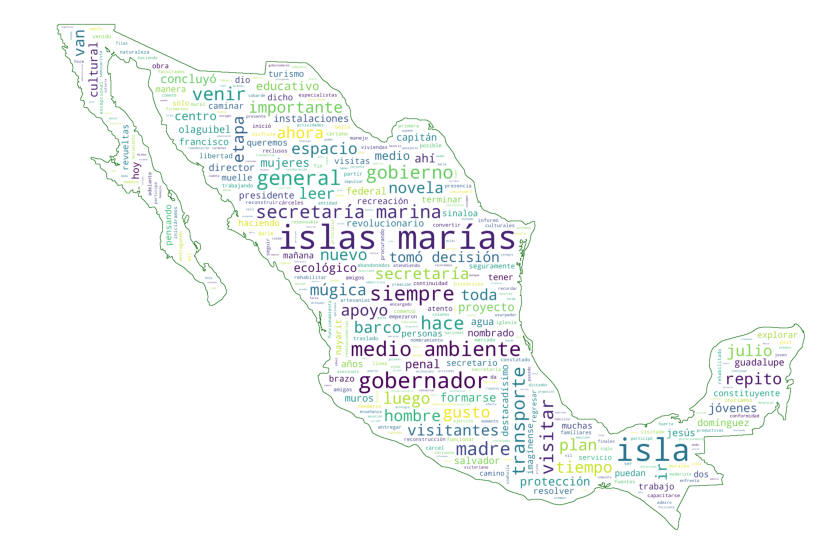

In [66]:
import os
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image 

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

map_mask = np.array(Image.open('../images/mask_mexico.png'))

wc = WordCloud(max_words=3000, margin=10, background_color='white',
scale=3, relative_scaling = 0.5, width=400, height=300, mask=map_mask,
random_state=1, stopwords=stop_words, contour_width=3, contour_color='darkgreen')

wc.generate(' '.join(filtered_words))

# store to file
wc.to_file(path.join(d, '../images/saved_images/wordcloud_presidente_2021_02_19.png') )

plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [67]:
import collections

#filtered_words = [word for word in data.split() if word not in stop_words]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

In [68]:
for i, word in enumerate(words):
    print(words[i] + ": " + str(counts[i]))


islas: 22
marías: 17
isla: 10
medio: 6
secretaría: 6
gobernador: 6
ambiente: 5
general: 5
siempre: 5
madre: 4


<BarContainer object of 10 artists>

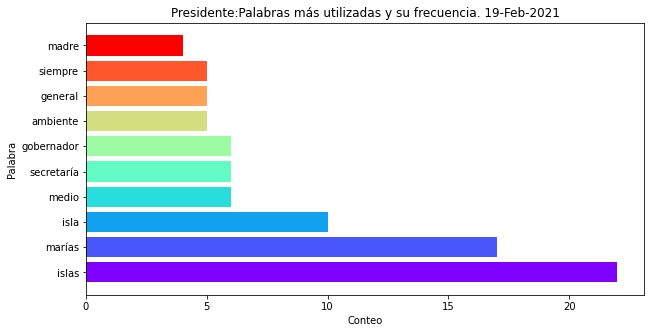

In [69]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

from matplotlib import rcParams

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 10, 5

plt.title('Presidente:Palabras más utilizadas y su frecuencia. 19-Feb-2021')
plt.xlabel('Conteo')
plt.ylabel('Palabra')
plt.barh(words, counts, color=colors)